Load Public Health England (PHE) datasets for Clinical Commissioning Groups (CCGs)

In [16]:
import pandas as pd
import numpy as np
import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go

In [3]:
#load datasets
ccgs_92377=pd.read_csv('ccgs_92377_clean.csv',low_memory=False)

In [4]:
timeperiods=ccgs_92377['Timeperiod'].unique()

In [5]:
#list of ccg names 
ccgs_list=ccgs_92377['CCG'].unique()
ccgs_list=ccgs_list.tolist()
len (ccgs_list)

207

In [6]:
all_ccgs=pd.DataFrame()
for index, value in enumerate (ccgs_list):
        indicator_ccg=ccgs_92377[ccgs_92377['CCG']==value]
        indicator_ccg_values=indicator_ccg.loc[:,'Value']
        all_ccgs [value]=pd.Series()
        all_ccgs [value]=indicator_ccg_values.values #store the indicator data for all ccgs

In [7]:
# descriptive_all contains descriptive statistics for indicator=92377 for all trusts
descriptive_all=pd.DataFrame(all_ccgs.describe())

In [8]:
descriptive_all

,"Airedale, Wharfdale And Craven",Ashford,Aylesbury Vale,Barking And Dagenham,Barnet,Barnsley,Basildon And Brentwood,Bassetlaw,Bath And North East Somerset,Bedfordshire,...,Wolverhampton,Wyre Forest,Newcastle And Gateshead,Coastal West Sussex,Guildford and Waverley,North Cumbria,Morecambe Bay,Manchester,Norwich,South Norfolk
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1.074778,1.209622,1.106975,1.098038,0.906051,1.206405,1.203008,1.164890,0.934722,1.103442,...,1.120031,1.104920,1.206751,1.022567,0.963430,1.224122,1.088055,1.198509,1.169760,1.036406
std,0.050070,0.059396,0.053593,0.092103,0.060262,0.073665,0.026030,0.040493,0.061877,0.029109,...,0.084167,0.023787,0.035266,0.030419,0.051231,0.028811,0.034805,0.048259,0.019072,0.028091
min,0.999962,1.112660,1.026128,0.960762,0.812227,1.123455,1.150493,1.093275,0.855116,1.045078,...,0.997114,1.063218,1.144757,0.976336,0.886211,1.185185,1.017995,1.118412,1.140132,0.989336
25%,1.034362,1.170531,1.064597,1.029688,0.864769,1.145351,1.187085,1.126265,0.870409,1.082621,...,1.047201,1.086426,1.183900,0.998117,0.921415,1.200108,1.067047,1.165540,1.155122,1.013380
50%,1.050515,1.198658,1.084759,1.059582,0.887932,1.161139,1.204364,1.163517,0.928720,1.098093,...,1.114167,1.101022,1.198618,1.010974,0.935641,1.211588,1.078653,1.184014,1.169860,1.029546
75%,1.124923,1.268521,1.164232,1.202810,0.970771,1.294031,1.225590,1.199812,0.998642,1.129833,...,1.204199,1.117165,1.233103,1.051900,1.021007,1.252983,1.118708,1.250601,1.183792,1.062535
max,1.151659,1.294971,1.187016,1.241309,0.994841,1.318954,1.243611,1.230074,1.030198,1.147970,...,1.237602,1.154954,1.281841,1.073516,1.042334,1.275286,1.143022,1.275296,1.205694,1.078609


In [9]:
descriptive_all=descriptive_all.transpose()
del descriptive_all['count']

In [10]:
descriptive_all['diff.']=descriptive_all['max']-descriptive_all['min']
descriptive_all['%diff.']=round(100*(descriptive_all['diff.']/descriptive_all['min']),1)
descriptive_all['AreaCode']=area_codes=ccgs_92377['AreaCode'].unique()
descriptive_all.head(10)

,mean,std,min,25%,50%,75%,max,diff.,%diff.,AreaCode
"Airedale, Wharfdale And Craven",1.074778,0.050070,0.999962,1.034362,1.050515,1.124923,1.151659,0.151697,15.2,E38000001
Ashford,1.209622,0.059396,1.112660,1.170531,1.198658,1.268521,1.294971,0.182311,16.4,E38000002
Aylesbury Vale,1.106975,0.053593,1.026128,1.064597,1.084759,1.164232,1.187016,0.160888,15.7,E38000003
Barking And Dagenham,1.098038,0.092103,0.960762,1.029688,1.059582,1.202810,1.241309,0.280547,29.2,E38000004
Barnet,0.906051,0.060262,0.812227,0.864769,0.887932,0.970771,0.994841,0.182613,22.5,E38000005
Barnsley,1.206405,0.073665,1.123455,1.145351,1.161139,1.294031,1.318954,0.195499,17.4,E38000006
Basildon And Brentwood,1.203008,0.026030,1.150493,1.187085,1.204364,1.225590,1.243611,0.093117,8.1,E38000007
Bassetlaw,1.164890,0.040493,1.093275,1.126265,1.163517,1.199812,1.230074,0.136798,12.5,E38000008
Bath And North East Somerset,0.934722,0.061877,0.855116,0.870409,0.928720,0.998642,1.030198,0.175082,20.5,E38000009
Bedfordshire,1.103442,0.029109,1.045078,1.082621,1.098093,1.129833,1.147970,0.102892,9.8,E38000010


In [11]:
descriptive_all.to_csv('diff_2014_2017_new.csv')

In [76]:
#sort by difference values
descriptive_all_sorted=descriptive_all.sort_values(by=['%diff.'],ascending=False)
descriptive_all_sorted.head(10)

,mean,std,min,25%,50%,75%,max,diff.,%diff.,AreaCode
Wokingham,1.096361,0.128674,0.887632,0.984855,1.114881,1.224667,1.258441,0.370809,41.8,E38000209
Southend,1.312266,0.134439,1.110766,1.214596,1.299737,1.427133,1.526374,0.415608,37.4,E38000168
Greenwich,1.008254,0.086350,0.876274,0.948608,0.978116,1.085627,1.153810,0.277536,31.7,E38000066
Enfield,0.980238,0.086953,0.866125,0.912279,0.943843,1.053164,1.139568,0.273442,31.6,E38000057
Ealing,0.922385,0.092077,0.807871,0.851348,0.869793,1.029526,1.062063,0.254192,31.5,E38000048
Southwark,0.822577,0.070574,0.711615,0.772357,0.799748,0.892505,0.934390,0.222775,31.3,E38000171
Vale Royal,1.124266,0.091501,0.954416,1.080340,1.101124,1.220634,1.247929,0.293513,30.8,E38000189
Corby,1.088365,0.085133,0.999059,1.033148,1.052709,1.125940,1.300060,0.301001,30.1,E38000037
West Lancashire,1.128477,0.083207,0.955026,1.082946,1.116282,1.213895,1.236643,0.281617,29.5,E38000200
Barking And Dagenham,1.098038,0.092103,0.960762,1.029688,1.059582,1.202810,1.241309,0.280547,29.2,E38000004


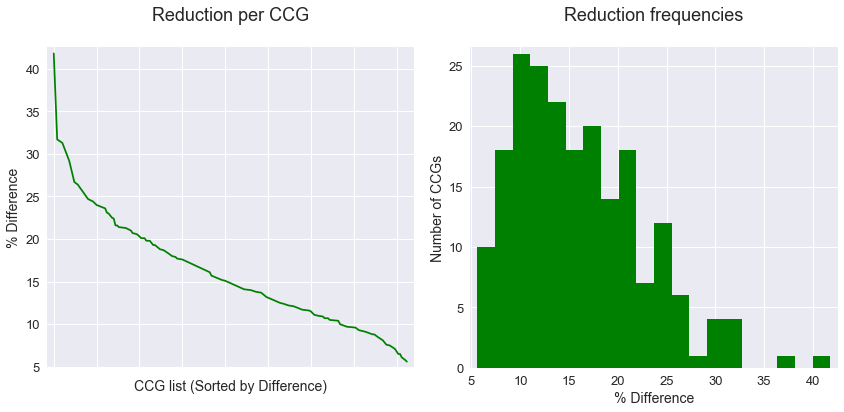

In [74]:
sns.set(font_scale = 1.3)

plt.subplot(1,2, 1)
kx=descriptive_all_sorted['%diff.'].plot(color=['green'], figsize=(12,6))
plt.xlabel('CCG list (Sorted by Difference)',fontsize=14)
plt.ylabel('% Difference', fontsize=14)
kx.set_title('Reduction per CCG\n', fontsize=18)
kx.margins(0.02)

plt.subplot(1,2, 2)
lx=descriptive_all_sorted['%diff.'].plot(kind='hist',bins=20, color=['green'], figsize=(12,6))
lx.set_title('Reduction frequencies\n', fontsize=18)
plt.xlabel('% Difference',fontsize=14)
plt.ylabel('Number of CCGs', fontsize=14)
lx.margins(0.02)


plt.tight_layout()
plt.show()

In [75]:
#plotly
data = [
    go.Scatter(
        x=descriptive_all.index, 
        y=descriptive_all_sorted['%diff.'],
        mode = 'lines+markers',
        line = dict(
        color = ('rgb(40, 140, 60)'),
        width = 2)
    )
]
py.iplot(data, filename='%diff_ccgs')

Findings: The typical difference between minimal and maximal levels of perscription is aruond 10%. 
Some trusts however, showed much higher levels of difference, between 25-40%. 

Are these high differences the result of improvement? 
That is, is there a historical trajectory in these trusts from high to low presecription levels?
Test: 1 visually, isolate ccgs with difference between 25-40% and examine them with line plots. 

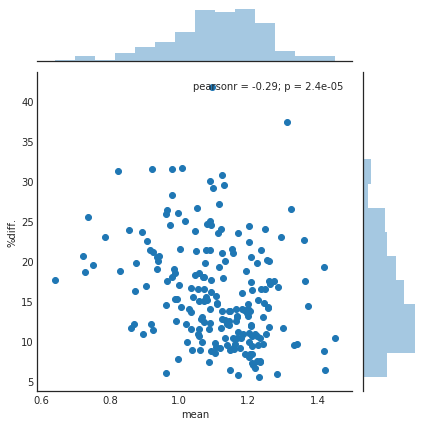

In [14]:
with sns.axes_style('white'):
    sns.jointplot('mean','%diff.',data=descriptive_all)

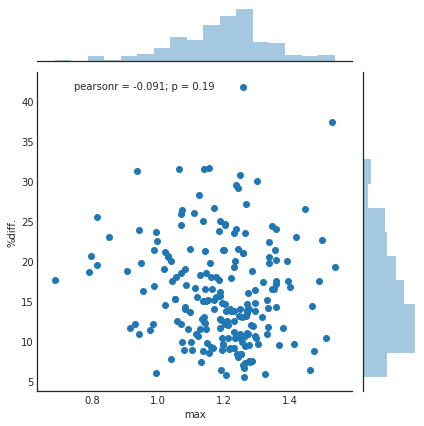

In [15]:
with sns.axes_style('white'):
    sns.jointplot('max','%diff.',data=descriptive_all)

In [16]:
diff_class=[]
diff_list=descriptive_all['%diff.'].values
for index, value in enumerate (diff_list):
    if value >29.9 :
        diff_class.append ('>30%-')
    elif value >=10 and value <=29.9:
        diff_class.append ('10%-29%')
    else:
        diff_class.append ('<10%')
descriptive_all['diff_class']=diff_class #column diff_class contains classification of ccgs by %diff.|

In [17]:
descriptive_all.to_csv('diff_class.csv')

In [ ]:
ccgs_diff_list=descriptive_all[(descriptive_all['%diff.']>=30)].index #list of ccgs with diff>30%
diff_ccgs=pd.DataFrame()
#collect time series for ccgs to a dataframe (diff_ccgs)
for index, value in enumerate (ccgs_diff_list):
    indicator_ccg_values=all_ccgs[value]
    diff_ccgs [value]=indicator_ccg_values
diff_ccgs=diff_ccgs.set_index(timeperiods)

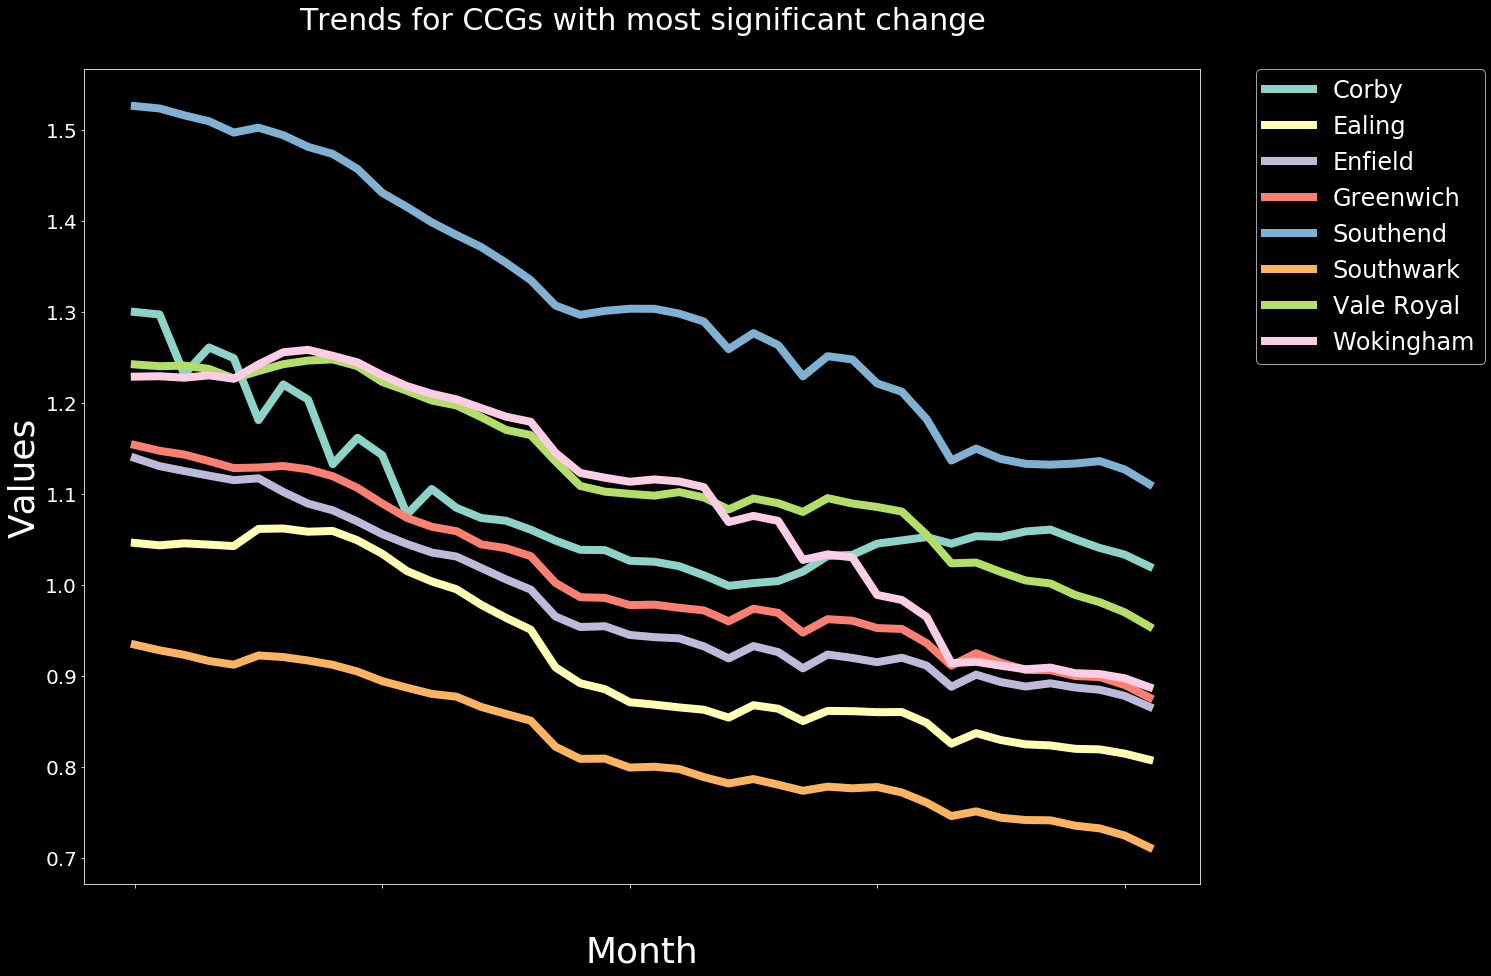

In [19]:
#plot time series

plt.style.use('dark_background')
with sns.color_palette("Set3", 10):
    ax=diff_ccgs.plot(figsize=(20,15), fontsize=20, linewidth=8)
ax.set_title('Trends for CCGs with most significant change\n', fontsize=30)
ax.set_xlabel('\nMonth', fontsize=36)
ax.set_ylabel('Values', fontsize=36)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=24, borderaxespad=0.)
plt.show()

The chart shows that min-max for the ccgs examined reflected an improvment with a gradual decline in levels of Ab prescribing

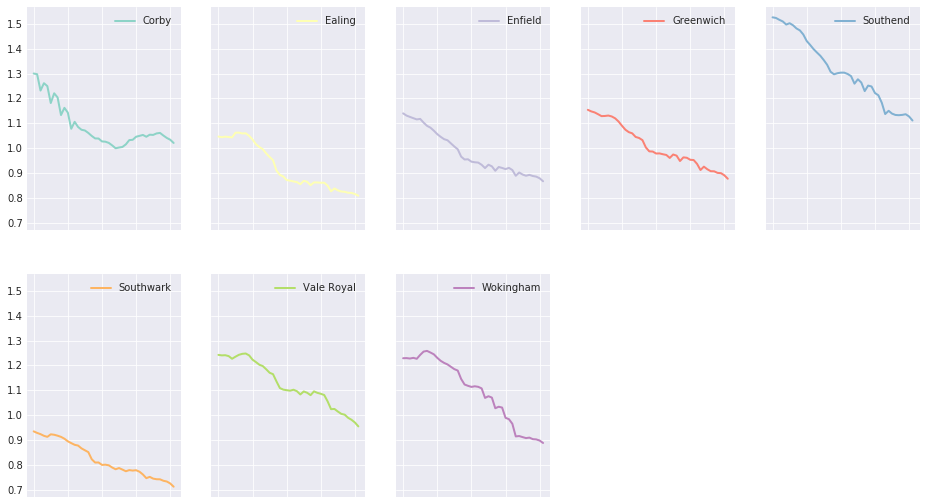

In [20]:
with sns.axes_style("darkgrid"):
    diff_ccgs.plot(subplots=True,linewidth=2,layout=(2, 5),figsize=(16, 10),fontsize=10,sharex=True,sharey=True)
plt.show()

In [21]:
#results in csv
diff_ccgs=round (diff_ccgs, 3)
diff_ccgs.to_csv('diff_lead_ccgs.csv')